In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
import math

In [17]:
import time
start_time = time.time()

In [18]:
knn_coeff=11
def knn_algo_euc(x_train,y_train,x_test,y_test,knn_coeff):
    l_final=[]
    for i in range(len(x_test)):
        l_l=[]
        for j in range(len(x_train)):
            l_local=[]
            ll=np.array(x_test.iloc[i]-x_train.iloc[j])
            euc_dis=0
            for k in range(len(ll)):
                euc_dis+=abs(ll[k])
            l_local.append(euc_dis)
            l_local.append(j)
            l_l.append(l_local)
        final=sorted(l_l,key=itemgetter(0))
        l_final.append(final[:knn_coeff])
    fin_y=[]
    l1=list(y_train['Outcome'])
    for i in range(len(l_final)):
        local_i=[]
        for j in range(knn_coeff):
            idx=l_final[i][j][1]
            local_i.append(l1[idx])
#     print(local_i)
        n_one=local_i.count(1)
        n_zero=local_i.count(0)
        if n_one>n_zero:
            fin_y.append(1)
        else:
            fin_y.append(0)
    l2=list(y_test['Outcome'])
    n_correct=0
    for i in range(len(fin_y)):
        if fin_y[i]==l2[i]:
            n_correct+=1
    eff=(n_correct/len(fin_y))*100
    print("the efficiency is :",eff)
    print("the number of correct entries are: ",n_correct,end=" ")
    print("out of :",len(fin_y))
#     return l_final
def knn_algo_sq(x_train,y_train,x_test,y_test,knn_coeff):
    l_final=[]
    for i in range(len(x_test)):
        l_l=[]
        for j in range(len(x_train)):
            l_local=[]
            ll=np.array(x_test.iloc[i]-x_train.iloc[j])
            sq_dis=0
            for k in range(len(ll)):
                q=abs(ll[k])
                q1=q*q
                sq_dis+=q1
            l_local.append(math.sqrt(sq_dis))
            l_local.append(j)
            l_l.append(l_local)
        final=sorted(l_l,key=itemgetter(0))
        l_final.append(final[:knn_coeff])
    fin_y=[]
    l1=list(y_train['Outcome'])
    for i in range(len(l_final)):
        local_i=[]
        for j in range(knn_coeff):
            idx=l_final[i][j][1]
            local_i.append(l1[idx])
#     print(local_i)
        n_one=local_i.count(1)
        n_zero=local_i.count(0)
        if n_one>n_zero:
            fin_y.append(1)
        else:
            fin_y.append(0)
    l2=list(y_test['Outcome'])
    n_correct=0
    for i in range(len(fin_y)):
        if fin_y[i]==l2[i]:
            n_correct+=1
    eff=(n_correct/len(fin_y))*100
    print("the efficiency is :",eff)
    print("the number of correct entries are: ",n_correct,end=" ")
    print("out of :",len(fin_y))
#     return fin_y


In [19]:
data_x=pd.read_csv('Diabetes_XTrain.csv')
data_y=pd.read_csv('Diabetes_YTrain.csv')
df_x=pd.DataFrame(data_x)
df_y=pd.DataFrame(data_y)
df_complete=pd.concat([df_x,df_y], axis=1, join='inner')

In [20]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
 8   Outcome                   576 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 40.6 KB


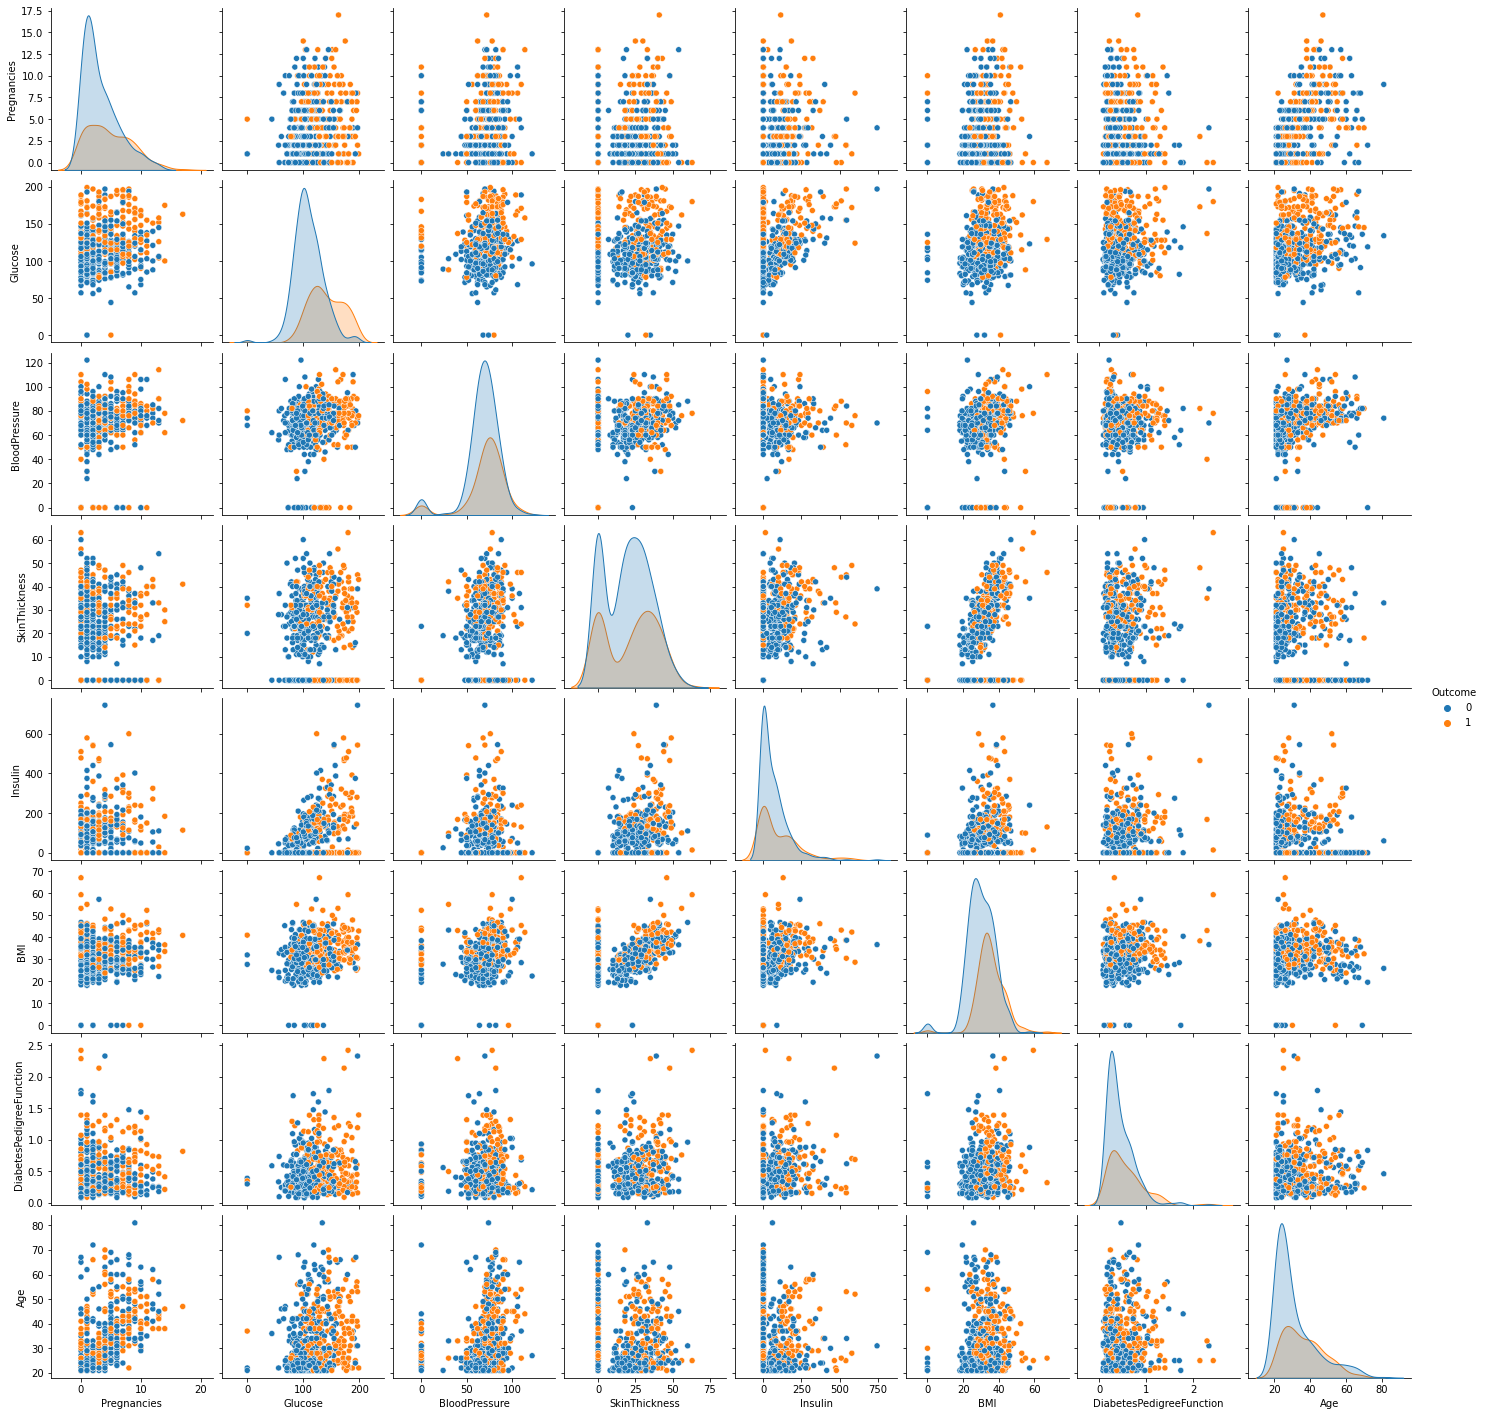

In [21]:
sns.pairplot(df_complete,hue='Outcome')

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.20,random_state=42)

In [23]:
knn_algo_euc(x_train,y_train,x_test,y_test,knn_coeff=13)

the efficiency is : 75.86206896551724
the number of correct entries are:  88 out of : 116


In [24]:
knn_algo_sq(x_train,y_train,x_test,y_test,knn_coeff=11)

the efficiency is : 76.72413793103449
the number of correct entries are:  89 out of : 116


In [25]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 30.676340341567993 seconds ---
